# Plot Ba-As-S Predictions
Plot predictions from the Ba-As-S system from our ML models.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import ternary
import os

Things to change

In [2]:
fig_width = 3.3
fig_height = 1.9

## Load in the Predictions
These were generated by `scan-BAsS-system.in`

In [3]:
data = pd.read_csv('Ba-As-S.csv')

## Remove the binary predictions
To make for a cleaner plot

In [4]:
data = data[data[['X_Ba', 'X_As', 'X_S']].min(axis=1) > 0]

## Plot the Band Gap, Delta_E, Stability

In [5]:
data.sort_values('stability_predicted').head()

,X_S,X_As,X_Ba,class_measured,class_predicted,bandgap_measured,bandgap_predicted,delta_e_measured,delta_e_predicted,delta_e-normed_measured,delta_e-normed_predicted,stability_measured,stability_predicted,stability-normed_measured,stability-normed_predicted
333,0.833333,0.083333,0.083333,None,1.876036,None,1.876036,None,-0.922290,None,-0.724948,None,-0.420670,None,-0.223327
291,0.818182,0.090909,0.090909,None,1.876036,None,1.876036,None,-0.935270,None,-0.770632,None,-0.388048,None,-0.223409
323,0.750000,0.166667,0.083333,None,1.854747,None,1.854747,None,-0.926246,None,-0.806457,None,-0.357958,None,-0.238169
246,0.800000,0.100000,0.100000,None,1.876036,None,1.876036,None,-0.953133,None,-0.810509,None,-0.351189,None,-0.208565
282,0.727273,0.181818,0.090909,None,1.854747,None,1.854747,None,-0.957669,None,-0.887804,None,-0.337718,None,-0.267853


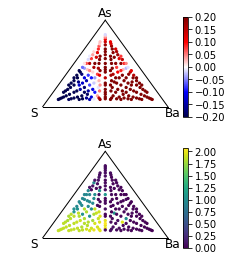

In [6]:
fig, axs = plt.subplots(2, 1)

# Compute the x/y positions of the dots
xs, ys = ternary.helpers.project_sequence(data[['X_Ba', 'X_As', 'X_S']].values)

for ax, d, c, l, o in zip(axs, ['stability_predicted', 'bandgap_predicted'],
                       ['seismic', 'viridis'], ['Stability', 'Band Gap'],
                       [{'vmin': -0.2, 'vmax': 0.2}, {'vmin': 0}]):
    _, tax = ternary.figure(scale=1, ax=ax)
    
    ax.axis('off')

    sc = ax.scatter(xs, ys, s=5, c=data[d], cmap=c, **o)

    #xs, ys = ternary.helpers.project_sequence([[4 / 7, 2/7, 1/7]])
    #ax.scatter(xs, ys, marker='o', s=25, facecolor='none', edgecolor='w')

    tax.boundary(linewidth=1.0)
    fig.colorbar(sc, ax=ax)

    ax.text(1.1, -.10, 'Ba', ha='right', fontsize=12) # 1st elem
    ax.text(.50, .90, 'As', ha='center', fontsize=12) # 2nd elem
    ax.text(-.10, -.10, 'S', ha='left', fontsize=12) # 3rd elem
  
fig.set_size_inches(fig_width, fig_height * 2)
fig.tight_layout()
fig.savefig(os.path.join('figures', 'BaAsS.png'), dpi=320)
fig.savefig(os.path.join('figures', 'BaAsS.pdf'))